In [1]:
import pandas as pd
import numpy as np


In [2]:
quora = pd.read_csv("/home/Kaggle/quora/train.csv")

In [3]:
duplicates = quora[quora.is_duplicate ==1]
not_dupes = quora[quora.is_duplicate ==0]

print(duplicates.shape)
print(not_dupes.shape)
print(duplicates.columns)

duplicates = duplicates.drop(axis=1,labels=['id','qid1','qid2'])
not_dupes = not_dupes.drop(axis=1,labels=['id','qid1','qid2'])


(149263, 6)
(255027, 6)
Index([u'id', u'qid1', u'qid2', u'question1', u'question2', u'is_duplicate'], dtype='object')


In [4]:
from nltk import word_tokenize
from nltk.corpus import stopwords


import re
q1_tokens = []
for x in duplicates['question1']:
    q1_tokens.append(word_tokenize(re.sub('[?!)}/:%*{&(@#$.,]', '', x.decode("UTF-8","strict"))))
q2_tokens = []
for x in duplicates['question2']:
    q2_tokens.append(word_tokenize(re.sub('[?!)}/:%*{&(@#$.,]', '', x.decode("UTF-8","strict"))))

from collections import Counter

# count word occurrences
a_vals = []
b_vals =[]

for x in range(0,len(q1_tokens)):
    a_vals.append(Counter(q1_tokens[x]))

for x in range(0,len(q2_tokens)):
    b_vals.append(Counter(q2_tokens[x]))
    


In [5]:
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    if(magA*magB) != 0:
        return dotprod / (magA * magB)


cosine = []
for x in range(0, len(a_vals)):
    cosine.append(counter_cosine_similarity(a_vals[x],b_vals[x]))

In [6]:
n_q1_tokens = []
for x in not_dupes['question1']:
    n_q1_tokens.append(word_tokenize(re.sub('[?!)}/:%*{&(@#$.,]', '', str(x))))
n_q2_tokens =[]
for x in not_dupes['question2']:
    n_q2_tokens.append(word_tokenize(re.sub('[?!)}/:%*{&(@#$.,]', '', str(x))))


    
n_a_vals = []
n_b_vals =[]

for x in range(0,len(n_q1_tokens)):
    n_a_vals.append(Counter(n_q1_tokens[x]))

for x in range(0,len(n_q2_tokens)):
    n_b_vals.append(Counter(n_q2_tokens[x]))
    
n_cosine = []

for x in range(0, len(n_a_vals)):
    n_cosine.append(counter_cosine_similarity(n_a_vals[x],n_b_vals[x]))



In [7]:
print (cosine[0:10])
print (n_cosine[0:10])

[0.5735393346764044, 0.5039526306789696, 0.4714045207910316, 0.6681531047810609, 0.9258200997725514, 0.2253744679276044, 0.75, 0.34668762264076824, 0.5070925528371099, 0.6123724356957945]
[0.9449111825230682, 0.45643546458763834, 0.253546276418555, 0.0, 0.4193139346887673, 0.0, 0.5477225575051661, 0.4444444444444444, 0.13333333333333333, 0.9574468085106383]


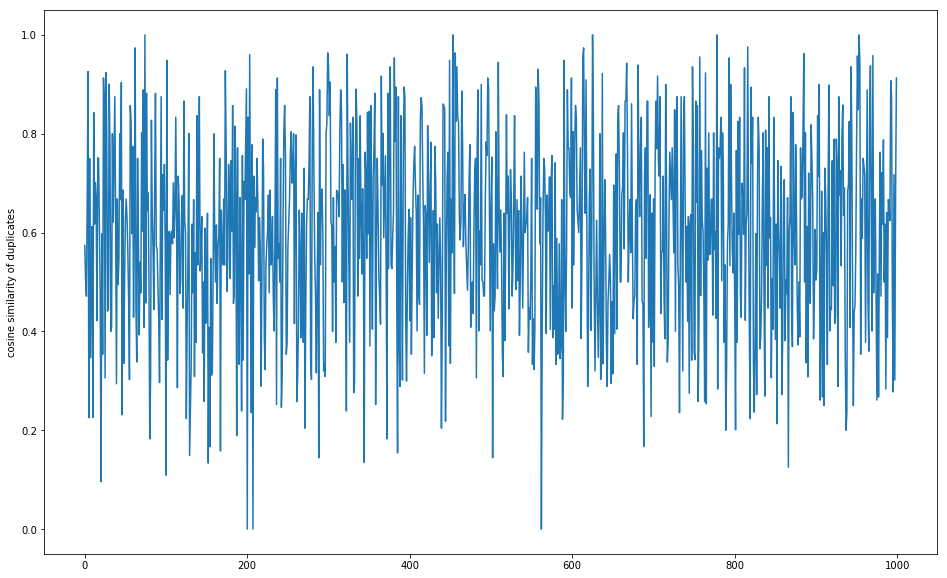

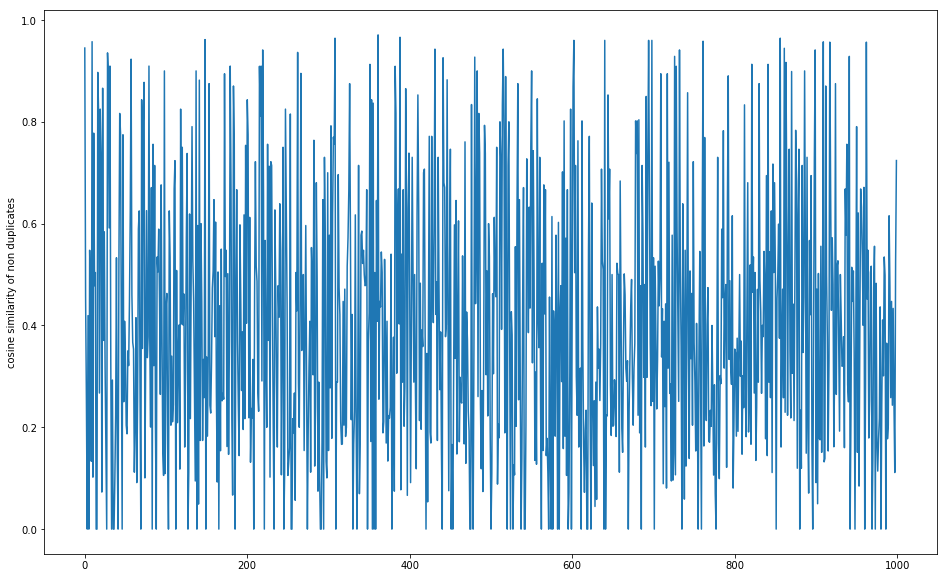

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(cosine[0:1000])
plt.ylabel('cosine similarity of duplicates')
plt.show()

plt.figure(figsize=(16,10))
plt.plot(n_cosine[0:1000])
plt.ylabel('cosine similarity of non duplicates')
plt.show()

In [9]:
#removing stop words and doing the same analysis


from nltk.corpus import stopwords

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return format(float(len(intersection))/len(union),'.5f')


djac =[]
for x in range(0,len(q1_tokens)):
     djac.append(jaccard_similarity(q1_tokens[x],q2_tokens[x]))


In [10]:
njac =[]
for x in range(0,len(n_q1_tokens)):
     njac.append(jaccard_similarity(n_q1_tokens[x],n_q2_tokens[x]))

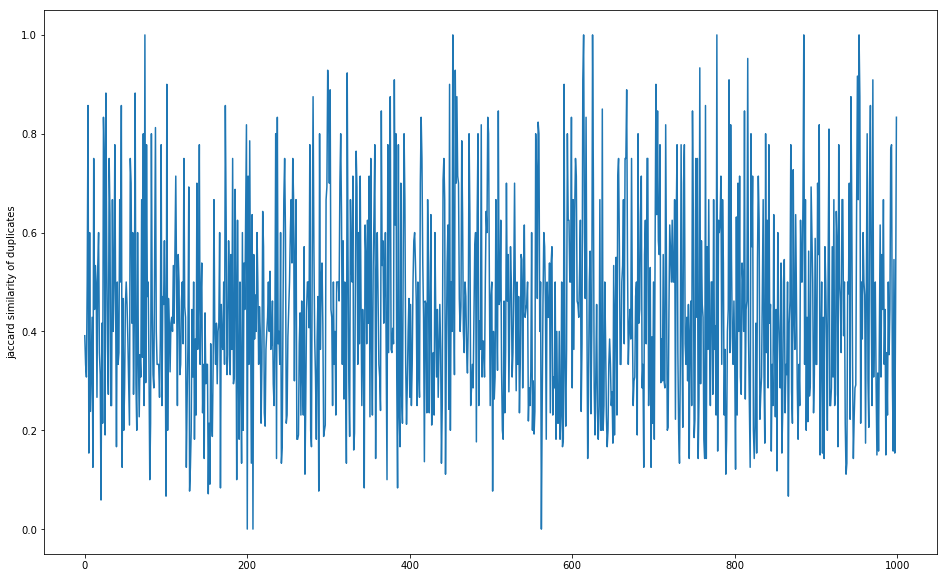

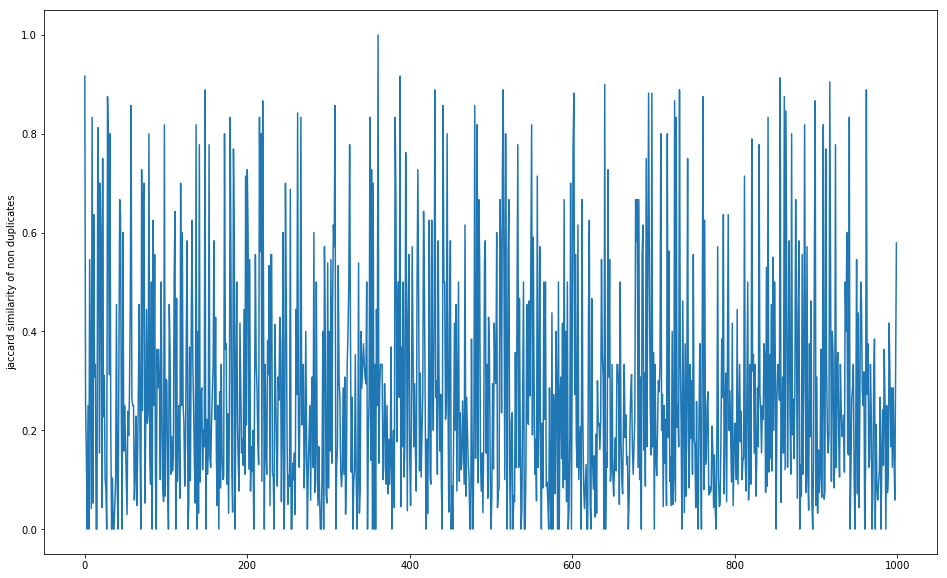

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(djac[0:1000])
plt.ylabel('jaccard similarity of duplicates')
plt.show()

plt.figure(figsize=(16,10))
plt.plot(njac[0:1000])
plt.ylabel('jaccard similarity of non duplicates')
plt.show()

In [12]:
print sum([float(i) for i in cosine])/len(cosine)
print sum([x for x in n_cosine if x != None])/len(n_cosine)

print "clearly cosine similarity is a better measure than jaccard similarity"


print sum([float(i) for i in djac]) /len(djac)
print sum([float(i) for i in njac]) /len(njac)


0.590783387844
0.407865488007
clearly cosine similarity is a better measure than jaccard similarity
0.439583344164
0.283245268658
